## Prueba de  Modelos supervisados
![image.png](attachment:95702e4f-3c23-4c14-b887-82214f262d60.png)

#### Pontificia Universidad Católica de Chile
Diplomado en Data Science

Septiembre 2021


### Nombre:

Angelo Francisco Inostroza Inostroza - 
Christopher Alexis Recabarren Verdugo


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (`2009_1perc.csv` y `2010_1perc.csv`) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará (0.5 puntos)
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [717]:
#!pip uninstall pandas-profiling
#!pip install pandas-profiling[notebook,html]

In [718]:
#!pip install pandas-profiling[notebook]

In [873]:
#Carga de librerías
import pandas as pd
import pandas_profiling as pp
import numpy as np
import missingno as msngo
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.- Importación y revisión de los datos (1 punto)

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración *básica* de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [720]:
datos_2009 = pd.read_csv("https://raw.githubusercontent.com/Vngel0/Python_UC/main/2009_1perc.csv")
datos_2010 = pd.read_csv("https://raw.githubusercontent.com/Vngel0/Python_UC/main/2010_1perc.csv")

datos = pd.concat([datos_2009, datos_2010])
datos.reset_index(drop=True)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,...,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,41,41,N,N,,,M,B,7111984,24,5,9,145,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,,L,,,STREET,,,63 STREET,37 AVENUE,,QUEENS,,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,43,43,Y,N,,S,M,Q,7031987,21,6,3,220,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,77,77,N,N,,,M,B,3131986,22,5,5,120,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,110,110,Y,Y,,,M,Q,9221991,18,5,6,165,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,449178,2010,60,7062,9262010,45,1,O,H,2.0,MISD,2,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,...,N,N,801,801,Y,N,,,M,B,2211990,20,5,10,150,BK,BR,T,,L,,,NYCHA,2257,WEST 11 STREE,AVENUE X,AVENUE V,,BROOKLYN,,,60,I,,,989382,155162,CM,1,20
11821,362162,2010,75,15797,7302010,10,A,O,P,1.0,ROBBERY,1,R,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,75,75,Y,N,V,S,M,Z,2111987,23,5,7,180,BK,BR,M,,L,,,STREET,,,PENNSYLVANIA AVENUE,FULTON STREET,,BROOKLYN,,,75,A,,,1012757,186018,CM,1,85
11822,208893,2010,123,830,4302010,1630,A,O,P,3.0,GLA,5,P,Y,N,N,,Y,1212 OTZ,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,123,123,N,N,,,M,W,8091962,1,6,0,200,GY,Z,M,,L,,,STREET,,,ARDEN AVENUE,DRUMGOOLE ROAD WEST,,STATEN IS,,,123,E,,,933868,138600,CM,1,46
11823,551820,2010,115,13122,11232010,2100,1,O,P,1.0,FELONY,5,P,Y,N,N,,N,,0,0,N,I,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,...,N,N,115,115,Y,N,V,S,M,Q,12191990,19,5,11,185,BK,BR,M,,L,,,SIDEWALK,,,NORTHERN BOULEVARD,77 STREET,,QUEENS,,,115,E,,,1014722,214388,CM,1,85


In [721]:
datos.head(5)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,...,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,CPW,2,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,41,41,N,N,,,M,B,7111984,24,5,9,145,BK,BR,M,,L,,,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,,BRONX,,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,5,P,Y,Y,N,,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,108,108,Y,N,V,S,M,A,12151993,15,5,5,140,BK,BR,T,,L,,,STREET,,,63 STREET,37 AVENUE,,QUEENS,,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,1,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,43,43,Y,N,,S,M,Q,7031987,21,6,3,220,BR,BR,M,,L,,,STREET,,,WATSON AVENUE,WHEELER AVENUE,,BRONX,,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,MIS,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,77,77,N,N,,,M,B,3131986,22,5,5,120,BK,BR,T,,L,,,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,,BROOKLYN,,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,10,P,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,110,110,Y,Y,,,M,Q,9221991,18,5,6,165,BK,BR,M,,L,,,SIDEWALK,,,53 AVENUE,108 STREET,,QUEENS,,,110,H,,,1024535,0209890,CM,1,20


In [722]:
datos.shape

#Tenemos 11825 registros y 112 variables

(11825, 112)

In [723]:
#reemplazo de celdas con espacio a celdas con valores perdidos
datos.replace(' ', np.nan, inplace=True) 

In [724]:
display(datos.info())

#Tenemos 7 float
#Tenemos 16 int
#Tenemos 89 object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(7), int64(16), object(89)
memory usage: 10.2+ MB


None

In [725]:
#profile = ProfileReport(datos, title="Pandas Profiling Report")

In [726]:
#profile

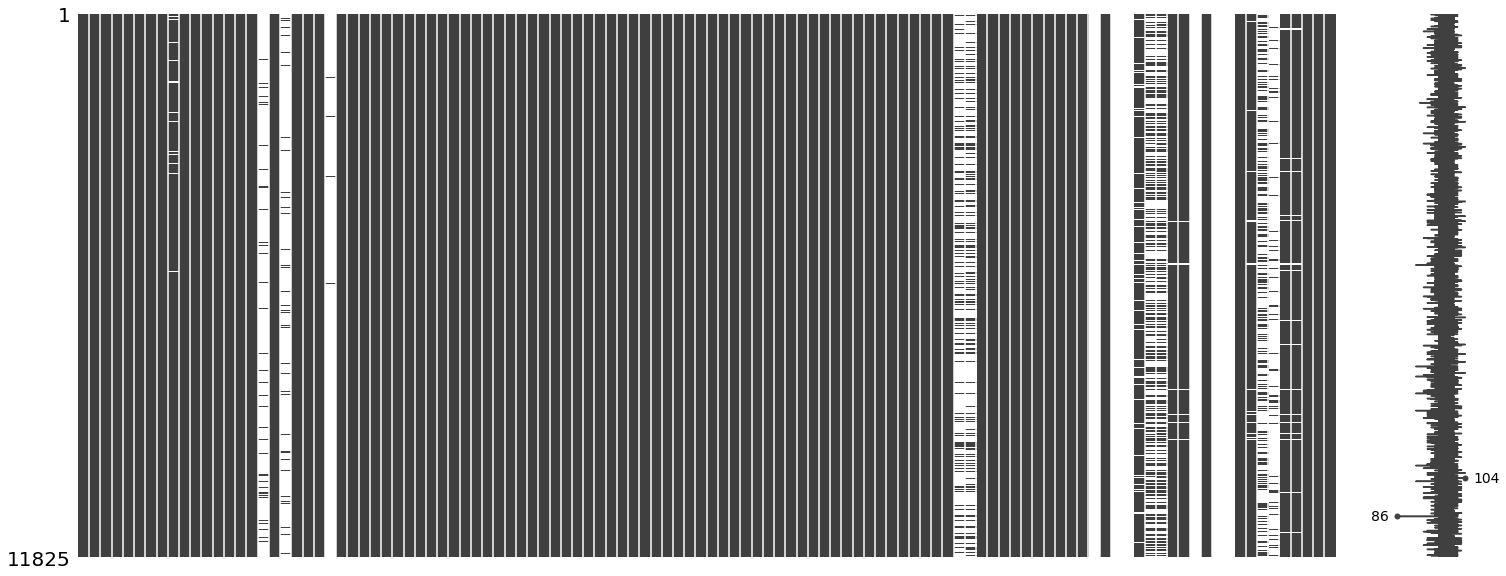

In [727]:
msngo.matrix(datos);

Como podemos observar en nuestros reportes, tenemos un total de 156.956 missing. En el gráfico podemos ver que hay variables que tienen muchos missing.

In [728]:
datos.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,othfeatr,rescode,premtype,aptnum,state,zip
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615,NaN,NaN,NaN,NaN,NaN,NaN
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884,NaN,NaN,NaN,NaN,NaN,NaN
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000,NaN,NaN,NaN,NaN,NaN,NaN


# 3.- Preprocesamiento de datos (1 punto)
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [729]:
datos_categoricos = datos.select_dtypes(include='object')
datos_categoricos

,recstat,inout,trhsloc,crimsusp,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,...,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,premname,addrnum,stname,stinter,crossst,city,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,A,O,P,CPW,P,Y,N,N,NaN,N,NaN,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,...,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,M,B,BK,BR,M,L,STREET,957,KELLY STREET,WESTCHESTER AVENUE,EAST 163 STREET,BRONX,41,G,7,NaN,1013067,0238633,CM,1,20
1,A,O,P,BURG,P,Y,Y,N,NaN,N,NaN,N,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,...,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,Y,N,V,S,M,A,BK,BR,T,L,STREET,NaN,NaN,63 STREET,37 AVENUE,QUEENS,108,J,NaN,NaN,1012043,0212157,CM,1,14
2,1,O,P,MISD,V,Y,N,N,NaN,N,NaN,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,NaN,S,M,Q,BR,BR,M,L,STREET,NaN,NaN,WATSON AVENUE,WHEELER AVENUE,BRONX,43,E,NaN,NaN,1017599,0240200,CM,1,20
3,A,O,P,MIS,P,Y,N,N,NaN,N,NaN,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,M,B,BK,BR,T,L,STREET,249,SCHENECTADY AVENUE,LINCOLN PLACE,SAINT JOHNS PLACE,BROOKLYN,77,J,4,35,1002625,0183442,CM,1,24
4,A,O,P,CPW,P,Y,Y,N,NaN,N,NaN,Y,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,NaN,NaN,M,Q,BK,BR,M,L,SIDEWALK,NaN,NaN,53 AVENUE,108 STREET,QUEENS,110,H,NaN,NaN,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,1,O,H,MISD,P,Y,N,N,NaN,N,NaN,Y,NaN,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,NaN,NaN,M,B,BK,BR,T,L,NYCHA,2257,WEST 11 STREE,AVENUE X,AVENUE V,BROOKLYN,60,I,NaN,NaN,989382,155162,CM,1,20
6009,A,O,P,ROBBERY,R,Y,N,N,NaN,N,NaN,N,NaN,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,...,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,V,S,M,Z,BK,BR,M,L,STREET,NaN,NaN,PENNSYLVANIA AVENUE,FULTON STREET,BROOKLYN,75,A,NaN,NaN,1012757,186018,CM,1,85
6010,A,O,P,GLA,P,Y,N,N,NaN,Y,1212 OTZ,Y,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,...,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,M,W,GY,Z,M,L,STREET,NaN,NaN,ARDEN AVENUE,DRUMGOOLE ROAD WEST,STATEN IS,123,E,NaN,NaN,933868,138600,CM,1,46
6011,1,O,P,FELONY,P,Y,N,N,NaN,N,NaN,N,I,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,V,S,M,Q,BK,BR,M,L,SIDEWALK,NaN,NaN,NORTHERN BOULEVARD,77 STREET,QUEENS,115,E,NaN,NaN,1014722,214388,CM,1,85


In [730]:
#profile_categoricos = ProfileReport(datos_categoricos, title="Pandas Profiling Report")

In [731]:
#profile_categoricos

In [732]:
excluir = ["crimsusp","arstoffn","sumoffen","premname","addrnum","stname","stinter","crossst","xcoord","ycoord"]
datos_categoricos = datos_categoricos.drop(excluir,axis=1)

Variable limpia. Tenemos 79 variables categoricas, las cuales poseen entre 2 y 99 categorias.

- 3.2 Reemplaze las siguientes clases faltantes:

  -Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
  
  -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor
  
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [733]:
datos_categoricos[["officrid", "offshld", "offverb"]] = datos_categoricos[["officrid", "offshld", "offverb"]]. replace (np.nan, "N")

In [734]:
df1=datos_categoricos[["officrid", "offshld", "offverb"]]
#profile_df1 = ProfileReport(df1, title="Pandas Profiling Report")

In [735]:
#profile_df1

In [736]:
datos_categoricos[["officrid"]] = datos_categoricos[["officrid"]]. replace ("I", "Y")
datos_categoricos[["offshld"]] = datos_categoricos[["offshld"]]. replace ("S", "Y")
datos_categoricos[["offverb"]] = datos_categoricos[["offverb"]]. replace ("V", "Y")


In [737]:
datos_categoricos[["officrid", "offshld", "offverb"]]

,officrid,offshld,offverb
0,N,N,N
1,N,Y,Y
2,N,Y,N
3,N,N,N
4,N,N,N
...,...,...,...
6008,N,N,N
6009,N,Y,Y
6010,N,N,N
6011,Y,Y,Y


In [738]:
datos_categoricos

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,post,dettypcm,linecm,detailcm
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,NaN,CM,1,20
1,A,O,P,P,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,Y,N,Y,Y,M,A,BK,BR,T,L,QUEENS,108,J,NaN,NaN,CM,1,14
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,NaN,NaN,CM,1,20
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,35,CM,1,24
4,A,O,P,P,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,N,N,M,Q,BK,BR,M,L,QUEENS,110,H,NaN,NaN,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,1,O,H,P,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,60,I,NaN,NaN,CM,1,20
6009,A,O,P,R,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,75,A,NaN,NaN,CM,1,85
6010,A,O,P,P,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,M,W,GY,Z,M,L,STATEN IS,123,E,NaN,NaN,CM,1,46
6011,1,O,P,P,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,115,E,NaN,NaN,CM,1,85


In [739]:
datos_categoricos[["sector", "trhsloc", "beat"]] = datos_categoricos[["sector", "trhsloc", "beat"]]. replace (np.nan, "U")

In [740]:
datos_categoricos[["sector", "trhsloc", "beat"]]

,sector,trhsloc,beat
0,G,P,7
1,J,P,U
2,E,P,U
3,J,P,4
4,H,P,U
...,...,...,...
6008,I,H,U
6009,A,P,U
6010,E,P,U
6011,E,P,U


- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [741]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(7), int64(16), object(89)
memory usage: 10.2+ MB


In [742]:
datos_no_categoricos = datos.select_dtypes(exclude='object')
datos_no_categoricos

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,othfeatr,rescode,premtype,aptnum,state,zip
0,178048,2009,41,1779,4032009,130,1.0,2,0,0,41,41,7111984,24,5,9,145,NaN,NaN,NaN,NaN,NaN,NaN
1,498873,2009,108,5805,10292009,1050,3.0,5,0,0,108,108,12151993,15,5,5,140,NaN,NaN,NaN,NaN,NaN,NaN
2,463573,2009,43,8340,10062009,1450,1.0,1,0,0,43,43,7031987,21,6,3,220,NaN,NaN,NaN,NaN,NaN,NaN
3,43626,2009,77,932,1232009,1843,5.0,5,0,0,77,77,3131986,22,5,5,120,NaN,NaN,NaN,NaN,NaN,NaN
4,563921,2009,110,11224,12132009,1655,3.0,10,0,0,110,110,9221991,18,5,6,165,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,449178,2010,60,7062,9262010,45,2.0,2,0,0,801,801,2211990,20,5,10,150,NaN,NaN,NaN,NaN,NaN,NaN
6009,362162,2010,75,15797,7302010,10,1.0,1,0,0,75,75,2111987,23,5,7,180,NaN,NaN,NaN,NaN,NaN,NaN
6010,208893,2010,123,830,4302010,1630,3.0,5,0,0,123,123,8091962,1,6,0,200,NaN,NaN,NaN,NaN,NaN,NaN
6011,551820,2010,115,13122,11232010,2100,1.0,5,0,0,115,115,12191990,19,5,11,185,NaN,NaN,NaN,NaN,NaN,NaN


In [743]:
#Fórmula para pasar de una medida a otra
def add(x, y):
    return (x*0.3048  + y*0.0254)

In [744]:
datos_no_categoricos[["meters"]] = add(datos_no_categoricos["ht_feet"],datos_no_categoricos["ht_inch"])

In [745]:
datos_no_categoricos

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,othfeatr,rescode,premtype,aptnum,state,zip,meters
0,178048,2009,41,1779,4032009,130,1.0,2,0,0,41,41,7111984,24,5,9,145,NaN,NaN,NaN,NaN,NaN,NaN,1.7526
1,498873,2009,108,5805,10292009,1050,3.0,5,0,0,108,108,12151993,15,5,5,140,NaN,NaN,NaN,NaN,NaN,NaN,1.6510
2,463573,2009,43,8340,10062009,1450,1.0,1,0,0,43,43,7031987,21,6,3,220,NaN,NaN,NaN,NaN,NaN,NaN,1.9050
3,43626,2009,77,932,1232009,1843,5.0,5,0,0,77,77,3131986,22,5,5,120,NaN,NaN,NaN,NaN,NaN,NaN,1.6510
4,563921,2009,110,11224,12132009,1655,3.0,10,0,0,110,110,9221991,18,5,6,165,NaN,NaN,NaN,NaN,NaN,NaN,1.6764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,449178,2010,60,7062,9262010,45,2.0,2,0,0,801,801,2211990,20,5,10,150,NaN,NaN,NaN,NaN,NaN,NaN,1.7780
6009,362162,2010,75,15797,7302010,10,1.0,1,0,0,75,75,2111987,23,5,7,180,NaN,NaN,NaN,NaN,NaN,NaN,1.7018
6010,208893,2010,123,830,4302010,1630,3.0,5,0,0,123,123,8091962,1,6,0,200,NaN,NaN,NaN,NaN,NaN,NaN,1.8288
6011,551820,2010,115,13122,11232010,2100,1.0,5,0,0,115,115,12191990,19,5,11,185,NaN,NaN,NaN,NaN,NaN,NaN,1.8034


In [746]:
datos_no_categoricos[["meters"]]

,meters
0,1.7526
1,1.6510
2,1.9050
3,1.6510
4,1.6764
...,...
6008,1.7780
6009,1.7018
6010,1.8288
6011,1.8034


- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/ 

In [747]:
datos_no_categoricos[["datestop"]]= pd.to_datetime(datos_no_categoricos["datestop"], format='%m%d%Y')

In [748]:
datos_no_categoricos[["datestop"]]

,datestop
0,2009-04-03
1,2009-10-29
2,2009-10-06
3,2009-12-03
4,2009-12-13
...,...
6008,2010-09-26
6009,2010-07-30
6010,2010-04-30
6011,2010-11-23


In [749]:
datos_no_categoricos["year"] = pd.DatetimeIndex(datos_no_categoricos["datestop"]).year
datos_no_categoricos["month"] = pd.DatetimeIndex(datos_no_categoricos["datestop"]).month

 - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [750]:
datos_seleccionados = datos_no_categoricos[["year","month", "meters","age"]]

In [751]:
df = pd.concat([datos_categoricos, datos_seleccionados], axis = 1)

In [752]:
df

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,...,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,post,dettypcm,linecm,detailcm,year,month,meters,age
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,NaN,CM,1,20,2009,4,1.7526,24
1,A,O,P,P,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,...,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,Y,N,Y,Y,M,A,BK,BR,T,L,QUEENS,108,J,U,NaN,CM,1,14,2009,10,1.6510,15
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,U,NaN,CM,1,20,2009,10,1.9050,21
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,35,CM,1,24,2009,12,1.6510,22
4,A,O,P,P,Y,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,N,N,M,Q,BK,BR,M,L,QUEENS,110,H,U,NaN,CM,1,20,2009,12,1.6764,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,1,O,H,P,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,60,I,U,NaN,CM,1,20,2010,9,1.7780,20
6009,A,O,P,R,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,...,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,75,A,U,NaN,CM,1,85,2010,7,1.7018,23
6010,A,O,P,P,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,M,W,GY,Z,M,L,STATEN IS,123,E,U,NaN,CM,1,46,2010,4,1.8288,1
6011,1,O,P,P,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,...,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,115,E,U,NaN,CM,1,85,2010,11,1.8034,19


In [753]:
criterio1 = df.age >18
criterio2 = df.age <100

In [754]:
df = df[criterio1 & criterio2]

In [755]:
df

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,...,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,post,dettypcm,linecm,detailcm,year,month,meters,age
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,NaN,CM,1,20,2009,4,1.7526,24
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,U,NaN,CM,1,20,2009,10,1.9050,21
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,35,CM,1,24,2009,12,1.6510,22
5,1,I,T,V,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,...,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,L,MANHATTAN,14,F,16,NaN,CM,1,26,2009,5,1.7272,47
6,1,O,P,P,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,...,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,67,N,U,NaN,CM,1,20,2009,11,1.8034,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,O,P,P,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,Y,F,Q,BR,BR,T,L,QUEENS,115,A,U,NaN,CM,1,46,2010,6,1.6764,21
6008,1,O,H,P,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,60,I,U,NaN,CM,1,20,2010,9,1.7780,20
6009,A,O,P,R,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,...,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,75,A,U,NaN,CM,1,85,2010,7,1.7018,23
6011,1,O,P,P,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,...,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,115,E,U,NaN,CM,1,85,2010,11,1.8034,19


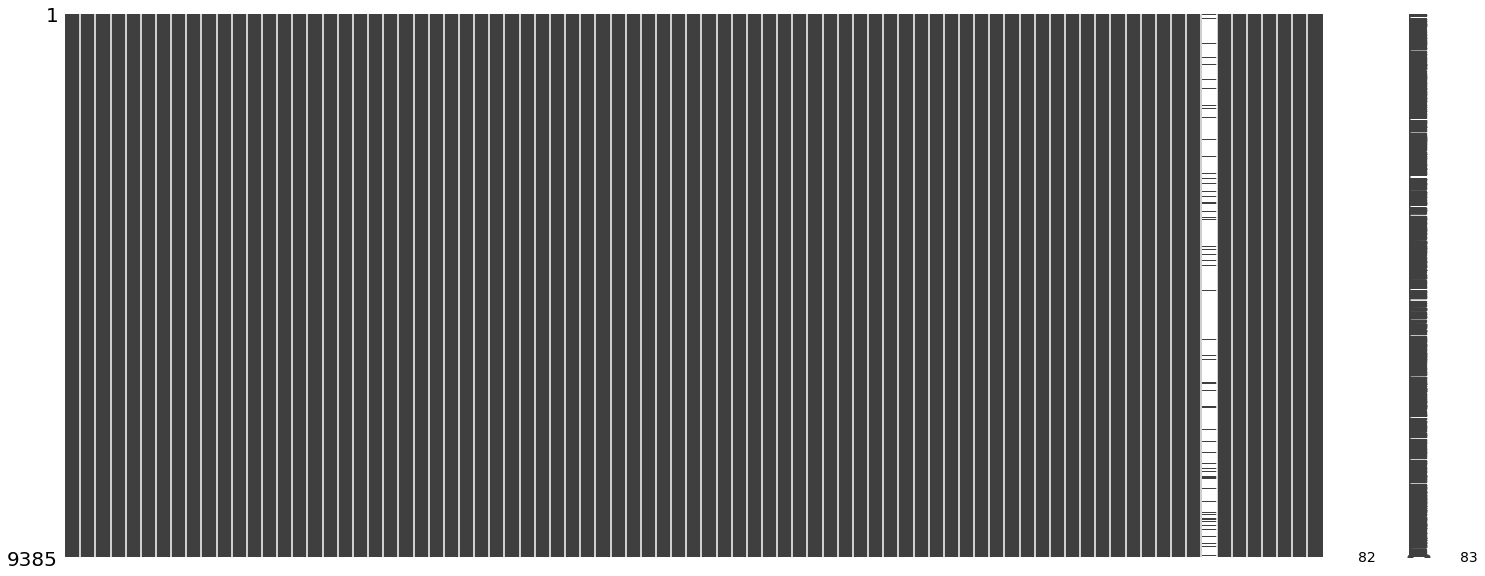

In [756]:
msngo.matrix(df);

In [757]:
#Eliminación de columna con mucha información faltante de la cual no tenemos antecedentes
df = df.drop(columns =["post"])

In [758]:
df

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,...,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,dettypcm,linecm,detailcm,year,month,meters,age
0,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,CM,1,20,2009,4,1.7526,24
2,1,O,P,V,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,U,CM,1,20,2009,10,1.9050,21
3,A,O,P,P,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,CM,1,24,2009,12,1.6510,22
5,1,I,T,V,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,...,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,L,MANHATTAN,14,F,16,CM,1,26,2009,5,1.7272,47
6,1,O,P,P,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,...,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,67,N,U,CM,1,20,2009,11,1.8034,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,O,P,P,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,...,N,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,Y,F,Q,BR,BR,T,L,QUEENS,115,A,U,CM,1,46,2010,6,1.6764,21
6008,1,O,H,P,Y,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,60,I,U,CM,1,20,2010,9,1.7780,20
6009,A,O,P,R,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,...,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,75,A,U,CM,1,85,2010,7,1.7018,23
6011,1,O,P,P,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,...,N,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,115,E,U,CM,1,85,2010,11,1.8034,19


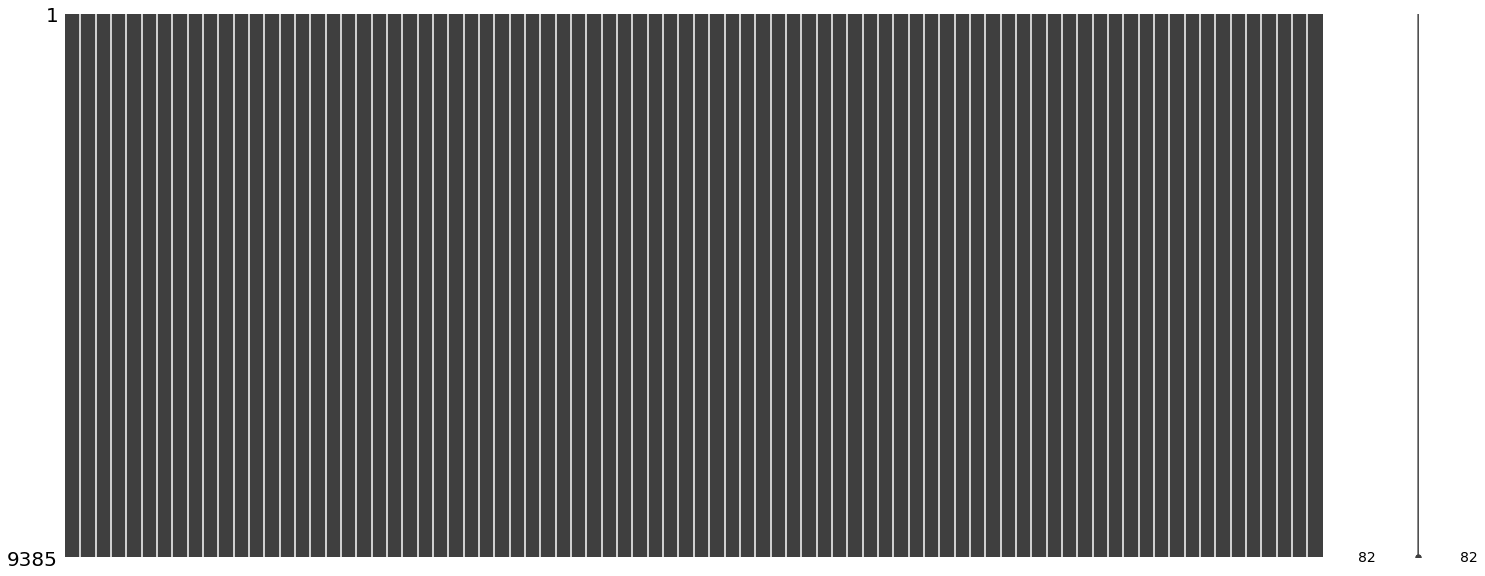

In [759]:
msngo.matrix(df);

Datasets unidos y sin datos faltantes, con los filtros solicitados aplicados. Se realiza una inspacción de Na y detectamos que hay una variable con un 90% aproximado de datos faltantes, por lo que es eliminada


# 4.- Análisis exploratorio (1 punto)

- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

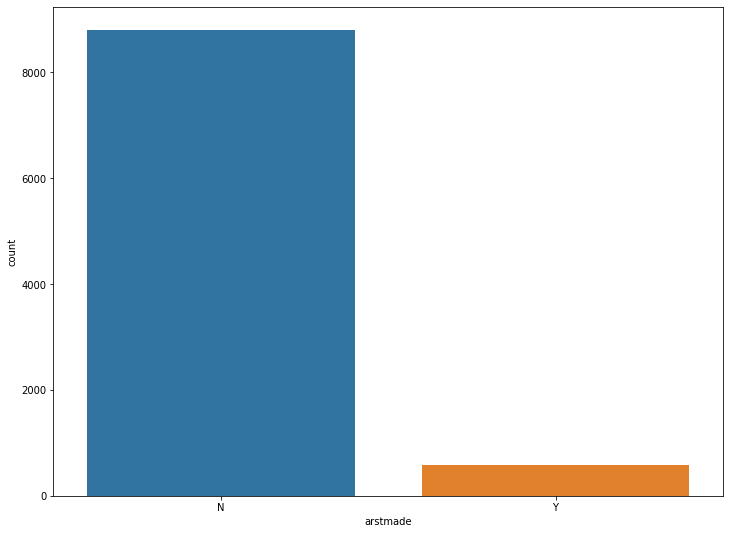

In [760]:
plt.rcParams['figure.figsize']=(12,9)
sns.countplot(x = "arstmade", data = df);

Notamos que tenemos una diferencia respecto a la cantidad de datos significativa entre "Yes" y "No" para la variable arsmade.

- 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

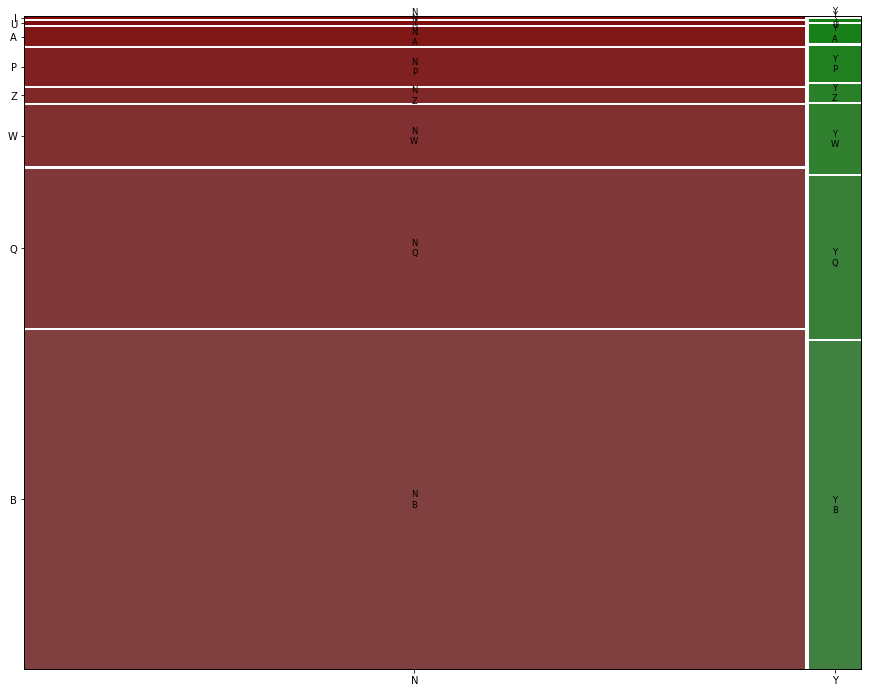

In [761]:
plt.rcParams['figure.figsize']=(15,12)
mosaic(data=df, index=['arstmade', 'race'])
plt.show()

In [762]:
# Tabla de contingencia arstmade / race
pd.crosstab(index=df['arstmade'], columns=df['race'], margins=True)

race,A,B,I,P,Q,U,W,Z,All
arstmade,,,,,,,,,
N,259,4675,32,513,2197,61,843,215,8795
Y,18,303,0,34,151,3,65,16,590
All,277,4978,32,547,2348,64,908,231,9385


Las razas tienen un comportamiento similar entre N y Y (N tiene mayor proporción a Y), siendo las que acumulan un mayor volumen las razas B, Q y W, en ambos casos. En nuestra tabla podemos observar que efectivamente las razas mencionadas son las que presentan una mayor frencuencia.

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

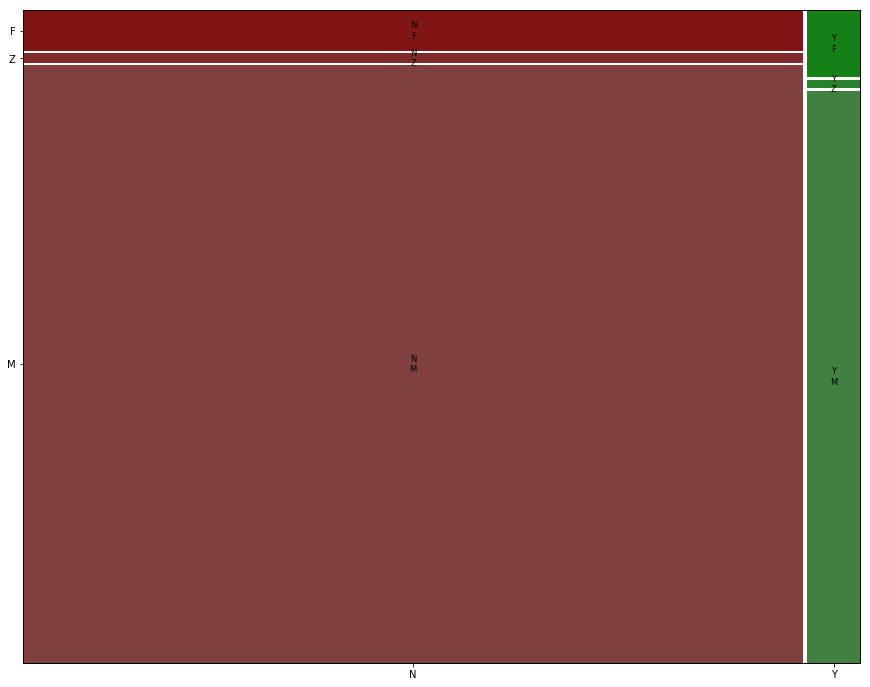

In [763]:
plt.rcParams['figure.figsize']=(15,12)
mosaic(data=df, index=['arstmade', 'sex'])
plt.show()

In [764]:
# Tabla de contingencia arstmade / sex
pd.crosstab(index=df['arstmade'], columns=df['sex'], margins=True)

sex,F,M,Z,All
arstmade,,,,
N,553,8107,135,8795
Y,61,521,8,590
All,614,8628,143,9385


Podemos apreciar que hay una mayor cantidad de N respecto a Y. Además, se puede notar que hay un mayor dominio del sexo Male.

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

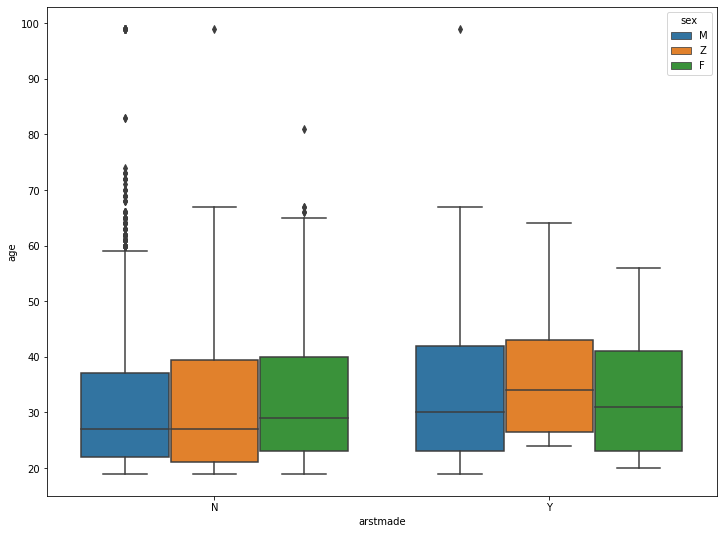

In [765]:
plt.rcParams['figure.figsize']=(12,9)
sns.boxplot(x="arstmade", y="age",hue="sex", data=df);

Podemos observar que para los Y, el sexo Z y F no presenta edades muy elevadas (ya que no se observan puntos alejados), no así en el resto. Para el caso de N, notamos que tenemos muchas personas con edades altas, aunque su media se mantiene cercana a los 30.

Ademas observamos que la media de los sexos Y respecto a los sexos N, es mayor en los 3 casos.

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [766]:
df["arstmade"] = df["arstmade"].replace ("N", "0")
df["arstmade"] = df["arstmade"].replace ("Y", "1")

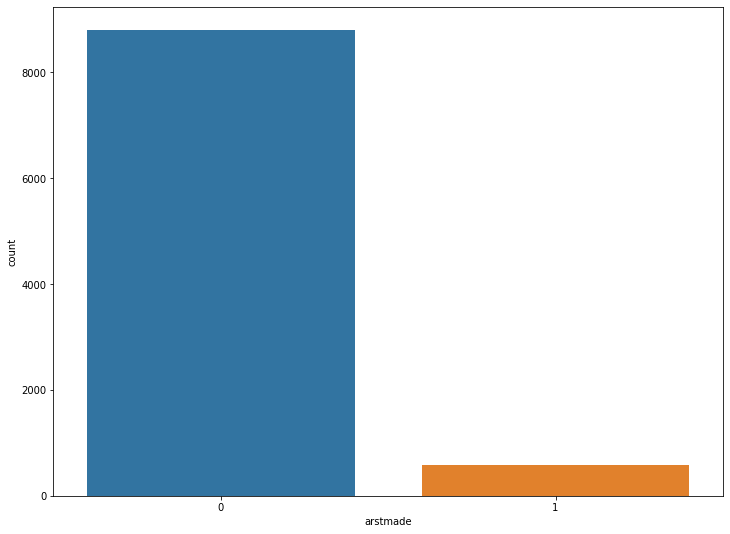

In [767]:
plt.rcParams['figure.figsize']=(12,9)
sns.countplot(x = "arstmade", data = df);

In [768]:
df["arstmade"].unique()

array(['0', '1'], dtype=object)

Recodificado.

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

In [769]:
prop = df.groupby('arstmade').size().div(len(df))
prop

arstmade
0    0.937134
1    0.062866
dtype: float64

In [770]:
prop2 = round(df.groupby(['sex', 'arstmade']).size().div(len(df)).div(prop, axis=0, level='arstmade')*100, 2)
prop2

sex  arstmade
F    0            6.29
     1           10.34
M    0           92.18
     1           88.31
Z    0            1.53
     1            1.36
dtype: float64

In [771]:
a = round(((df.groupby(['sex', 'race']).count() / df.groupby('sex').count())['arstmade'])*100, 2)
a

sex  race
F    A        3.58
     B       49.19
     I        0.33
     P        4.07
     Q       24.27
     U        0.81
     W       15.96
     Z        1.79
M    A        2.94
     B       53.94
     I        0.35
     P        6.02
     Q       25.31
     U        0.63
     W        9.33
     Z        1.48
Z    A        0.70
     B       15.38
     P        2.10
     Q       10.49
     U        3.50
     W        3.50
     Z       64.34
Name: arstmade, dtype: float64

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. (0.5 puntos)

Los atributos que tienen el prefijo pf (`['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']`) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [772]:
df_aux = df.copy()

In [773]:
 lista_variables = ['pf_hands','pf_wall','pf_grnd', 'pf_drwep', 'pf_ptwep','pf_baton','pf_hcuff', 'pf_pepsp','pf_other']

In [774]:
df_aux.pf_drwep.unique()

array(['N', 'Y'], dtype=object)

In [775]:
df_aux["violencia"] = 0

In [776]:
#Ciclo para creación de "Violencia" 
for col in lista_variables:
  df_aux["violencia"] = np.where(df_aux[col] == 'Y', df_aux['violencia'] + 1 , df_aux['violencia'] + 0)

df_aux["violencia"] = np.where(df_aux['violencia'] > 0, 1, 0)

In [876]:
df_aux.violencia.unique()

array([0, 1])

In [778]:
df_aux.head(n = 10)

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,...,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,dettypcm,linecm,detailcm,year,month,meters,age,violencia
0,A,O,P,P,Y,N,0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,...,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,CM,1,20,2009,4,1.7526,24,0
2,1,O,P,V,Y,N,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,U,CM,1,20,2009,10,1.9050,21,0
3,A,O,P,P,Y,N,0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,CM,1,24,2009,12,1.6510,22,0
5,1,I,T,V,Y,N,0,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,...,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,L,MANHATTAN,14,F,16,CM,1,26,2009,5,1.7272,47,0
6,1,O,P,P,Y,N,0,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,...,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,67,N,U,CM,1,20,2009,11,1.8034,20,0
8,A,O,P,P,Y,Y,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,N,Y,N,N,...,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,M,W,BK,BR,M,L,MANHATTAN,34,B,4,CM,1,45,2009,12,1.8542,19,1
9,A,O,P,P,Y,N,0,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,...,N,N,N,N,Y,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,67,N,U,CM,1,20,2009,4,1.7780,25,0
10,A,O,P,V,Y,N,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,...,N,N,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,T,L,QUEENS,113,J,U,CM,1,20,2009,11,1.7780,19,0
11,1,I,T,O,Y,N,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,...,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,Y,M,B,BK,BR,T,L,BROOKLYN,60,B,U,CM,1,85,2009,12,1.8288,31,0
12,1,I,T,V,Y,Y,1,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,Y,N,...,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,N,N,Y,Y,M,B,BK,BR,T,L,MANHATTAN,30,C,U,CM,1,85,2009,11,1.7272,23,0


In [878]:
print("0 :",df_aux.violencia.value_counts("%")[0])
print("1 :",df_aux.violencia.value_counts("%")[1])

0 : 0.7608950452850293
1 : 0.2391049547149707


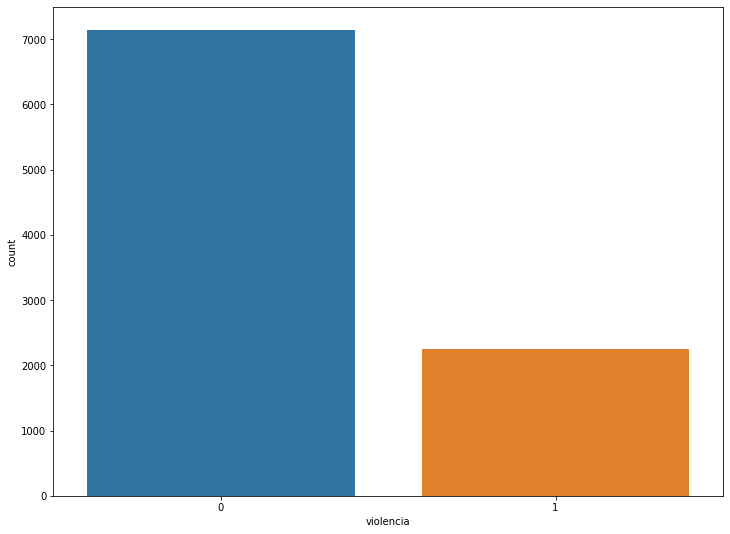

In [780]:
plt.rcParams['figure.figsize']=(12,9)
sns.countplot(x = "violencia", data = df_aux);

# 6.- Modelación (2 puntos)

- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test  utilizando el año 2009 para entrenar, y el año 2010 para testear. (0.5 pts)

In [781]:
df_aux.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti',
       'machgun', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep',
       'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio',
       'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir',
       'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth',
       'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir',
       'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time',
       'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis',
       'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race',
       'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'addrpct', 'sector',
       'beat', 'dettypcm', 'linecm', 'detailcm', 'year', 'month', 'met

In [782]:
dataset = df_aux.drop(columns = ['pf_hands','pf_wall','pf_grnd', 'pf_drwep', 'pf_ptwep','pf_baton','pf_hcuff', 'pf_pepsp','pf_other'])

In [783]:
dataset.columns #Variables eliminadas

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti',
       'machgun', 'othrweap', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim',
       'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng',
       'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other',
       'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg',
       'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build',
       'addrtyp', 'city', 'addrpct', 'sector', 'beat', 'dettypcm', 'linecm',
       'detailcm', 'year', 'month', 'meters', 'age', 'violencia'],
      dtype='object')

In [784]:
dataset.info() #Debemos transformar violencia

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9385 entries, 0 to 6012
Data columns (total 74 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recstat    9385 non-null   object 
 1   inout      9385 non-null   object 
 2   trhsloc    9385 non-null   object 
 3   typeofid   9385 non-null   object 
 4   explnstp   9385 non-null   object 
 5   othpers    9385 non-null   object 
 6   arstmade   9385 non-null   object 
 7   sumissue   9385 non-null   object 
 8   offunif    9385 non-null   object 
 9   officrid   9385 non-null   object 
 10  frisked    9385 non-null   object 
 11  searched   9385 non-null   object 
 12  contrabn   9385 non-null   object 
 13  adtlrept   9385 non-null   object 
 14  pistol     9385 non-null   object 
 15  riflshot   9385 non-null   object 
 16  asltweap   9385 non-null   object 
 17  knifcuti   9385 non-null   object 
 18  machgun    9385 non-null   object 
 19  othrweap   9385 non-null   object 
 20  radio   

In [785]:
dataset = dataset.astype({"violencia":"category"})

In [786]:
dataset.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti',
       'machgun', 'othrweap', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim',
       'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng',
       'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other',
       'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg',
       'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build',
       'addrtyp', 'city', 'addrpct', 'sector', 'beat', 'dettypcm', 'linecm',
       'detailcm', 'year', 'month', 'meters', 'age', 'violencia'],
      dtype='object')

In [787]:
dataset1 = pd.get_dummies(dataset[['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
        'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'adtlrept', 'pistol', 'riflshot', 'asltweap', 'knifcuti',
       'machgun', 'othrweap', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim',
       'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng',
       'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc',
       'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge',
       'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other',
       'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg',
       'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build',
       'addrtyp', 'city', 'sector', 'beat',"dettypcm","violencia"]])

In [788]:
dataset1

,recstat_1,recstat_A,inout_I,inout_O,trhsloc_H,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_O,typeofid_P,typeofid_R,typeofid_V,explnstp_N,explnstp_Y,othpers_N,othpers_Y,sumissue_N,sumissue_Y,offunif_N,offunif_Y,officrid_N,officrid_Y,frisked_N,frisked_Y,searched_N,searched_Y,contrabn_N,contrabn_Y,adtlrept_N,pistol_N,pistol_Y,riflshot_N,riflshot_Y,asltweap_N,asltweap_Y,knifcuti_N,knifcuti_Y,machgun_N,othrweap_N,othrweap_Y,...,beat_ 42,beat_ 61,beat_ 62,beat_1,beat_10,beat_11,beat_12,beat_13,beat_14,beat_15,beat_16,beat_17,beat_18,beat_19,beat_2,beat_20,beat_21,beat_22,beat_23,beat_24,beat_25,beat_26,beat_28,beat_3,beat_30,beat_32,beat_4,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_0,violencia_1
0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
5,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
6008,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
6009,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
6011,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [789]:
dataset

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,addrpct,sector,beat,dettypcm,linecm,detailcm,year,month,meters,age,violencia
0,A,O,P,P,Y,N,0,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,M,L,BRONX,41,G,7,CM,1,20,2009,4,1.7526,24,0
2,1,O,P,V,Y,N,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,Y,M,Q,BR,BR,M,L,BRONX,43,E,U,CM,1,20,2009,10,1.9050,21,0
3,A,O,P,P,Y,N,0,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,M,B,BK,BR,T,L,BROOKLYN,77,J,4,CM,1,24,2009,12,1.6510,22,0
5,1,I,T,V,Y,N,0,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,Y,M,B,BK,BR,M,L,MANHATTAN,14,F,16,CM,1,26,2009,5,1.7272,47,0
6,1,O,P,P,Y,N,0,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,67,N,U,CM,1,20,2009,11,1.8034,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,O,P,P,Y,Y,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,Y,Y,F,Q,BR,BR,T,L,QUEENS,115,A,U,CM,1,46,2010,6,1.6764,21,0
6008,1,O,H,P,Y,N,0,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,M,B,BK,BR,T,L,BROOKLYN,60,I,U,CM,1,20,2010,9,1.7780,20,1
6009,A,O,P,R,Y,N,0,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Z,BK,BR,M,L,BROOKLYN,75,A,U,CM,1,85,2010,7,1.7018,23,0
6011,1,O,P,P,Y,N,0,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,Y,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,M,Q,BK,BR,M,L,QUEENS,115,E,U,CM,1,85,2010,11,1.8034,19,1


In [790]:
dataset2 = dataset[["addrpct","detailcm","year","month","meters","age","arstmade"]]

In [791]:
dataset2

,addrpct,detailcm,year,month,meters,age,arstmade
0,41,20,2009,4,1.7526,24,0
2,43,20,2009,10,1.9050,21,0
3,77,24,2009,12,1.6510,22,0
5,14,26,2009,5,1.7272,47,0
6,67,20,2009,11,1.8034,20,0
...,...,...,...,...,...,...,...
6007,115,46,2010,6,1.6764,21,0
6008,60,20,2010,9,1.7780,20,0
6009,75,85,2010,7,1.7018,23,0
6011,115,85,2010,11,1.8034,19,0


In [792]:
data = pd.concat([dataset1, dataset2], axis=1)

In [793]:
data #Listo para entrenar

,recstat_1,recstat_A,inout_I,inout_O,trhsloc_H,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_O,typeofid_P,typeofid_R,typeofid_V,explnstp_N,explnstp_Y,othpers_N,othpers_Y,sumissue_N,sumissue_Y,offunif_N,offunif_Y,officrid_N,officrid_Y,frisked_N,frisked_Y,searched_N,searched_Y,contrabn_N,contrabn_Y,adtlrept_N,pistol_N,pistol_Y,riflshot_N,riflshot_Y,asltweap_N,asltweap_Y,knifcuti_N,knifcuti_Y,machgun_N,othrweap_N,othrweap_Y,...,beat_13,beat_14,beat_15,beat_16,beat_17,beat_18,beat_19,beat_2,beat_20,beat_21,beat_22,beat_23,beat_24,beat_25,beat_26,beat_28,beat_3,beat_30,beat_32,beat_4,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_0,violencia_1,addrpct,detailcm,year,month,meters,age,arstmade
0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,41,20,2009,4,1.7526,24,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,43,20,2009,10,1.9050,21,0
3,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,77,24,2009,12,1.6510,22,0
5,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,14,26,2009,5,1.7272,47,0
6,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,67,20,2009,11,1.8034,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,115,46,2010,6,1.6764,21,0
6008,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,60,20,2010,9,1.7780,20,0
6009,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,75,85,2010,7,1.7018,23,0
6011,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,115,85,2010,11,1.8034,19,0


In [794]:
data_estandar = data[["addrpct","detailcm","month","meters","age"]]

In [795]:
sc = StandardScaler()
data_estandar = sc.fit_transform(data_estandar[["addrpct","detailcm","month","meters","age"]]) #cuando se estandariza se pierde toda la información de nombre de columnas y otros

data_estandar = pd.DataFrame(data_estandar, columns = ["addrpct","detailcm","month","meters","age"])

print(data_estandar)

       addrpct  detailcm     month    meters       age
0    -0.801567 -0.707677 -0.930459  0.059573 -0.622158
1    -0.742221 -0.707677  0.900928  1.920107 -0.889228
2     0.266649 -0.545372  1.511391 -1.180783 -0.800205
3    -1.602729 -0.464220 -0.625228 -0.250516  1.425380
4    -0.030077 -0.707677  1.206159  0.679751 -0.978252
...        ...       ...       ...       ...       ...
9380  1.394211  0.347304 -0.319997 -0.870694 -0.889228
9381 -0.237786 -0.707677  0.595697  0.369662 -0.978252
9382  0.207304  1.929774 -0.014766 -0.560605 -0.711182
9383  1.394211  1.929774  1.206159  0.679751 -1.067275
9384 -1.602729 -0.585949  0.900928  1.299929  0.446122

[9385 rows x 5 columns]


In [796]:
data = data.drop(columns = ["addrpct","detailcm","month","meters","age"] )

In [797]:
data.reset_index(drop=True, inplace=True)

In [798]:
data = pd.concat([data,data_estandar], axis=1)

In [799]:
data

,recstat_1,recstat_A,inout_I,inout_O,trhsloc_H,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_O,typeofid_P,typeofid_R,typeofid_V,explnstp_N,explnstp_Y,othpers_N,othpers_Y,sumissue_N,sumissue_Y,offunif_N,offunif_Y,officrid_N,officrid_Y,frisked_N,frisked_Y,searched_N,searched_Y,contrabn_N,contrabn_Y,adtlrept_N,pistol_N,pistol_Y,riflshot_N,riflshot_Y,asltweap_N,asltweap_Y,knifcuti_N,knifcuti_Y,machgun_N,othrweap_N,othrweap_Y,...,beat_13,beat_14,beat_15,beat_16,beat_17,beat_18,beat_19,beat_2,beat_20,beat_21,beat_22,beat_23,beat_24,beat_25,beat_26,beat_28,beat_3,beat_30,beat_32,beat_4,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_0,violencia_1,year,arstmade,addrpct,detailcm,month,meters,age
0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,2009,0,-0.801567,-0.707677,-0.930459,0.059573,-0.622158
1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2009,0,-0.742221,-0.707677,0.900928,1.920107,-0.889228
2,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,2009,0,0.266649,-0.545372,1.511391,-1.180783,-0.800205
3,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2009,0,-1.602729,-0.464220,-0.625228,-0.250516,1.425380
4,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2009,0,-0.030077,-0.707677,1.206159,0.679751,-0.978252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,1.394211,0.347304,-0.319997,-0.870694,-0.889228
9381,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2010,0,-0.237786,-0.707677,0.595697,0.369662,-0.978252
9382,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,0.207304,1.929774,-0.014766,-0.560605,-0.711182
9383,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2010,0,1.394211,1.929774,1.206159,0.679751,-1.067275


In [800]:
data_train = data[data.year == 2009]
data_test = data[data.year == 2010]

In [801]:
data_train

,recstat_1,recstat_A,inout_I,inout_O,trhsloc_H,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_O,typeofid_P,typeofid_R,typeofid_V,explnstp_N,explnstp_Y,othpers_N,othpers_Y,sumissue_N,sumissue_Y,offunif_N,offunif_Y,officrid_N,officrid_Y,frisked_N,frisked_Y,searched_N,searched_Y,contrabn_N,contrabn_Y,adtlrept_N,pistol_N,pistol_Y,riflshot_N,riflshot_Y,asltweap_N,asltweap_Y,knifcuti_N,knifcuti_Y,machgun_N,othrweap_N,othrweap_Y,...,beat_13,beat_14,beat_15,beat_16,beat_17,beat_18,beat_19,beat_2,beat_20,beat_21,beat_22,beat_23,beat_24,beat_25,beat_26,beat_28,beat_3,beat_30,beat_32,beat_4,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_0,violencia_1,year,arstmade,addrpct,detailcm,month,meters,age
0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,2009,0,-0.801567,-0.707677,-0.930459,0.059573,-0.622158
1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2009,0,-0.742221,-0.707677,0.900928,1.920107,-0.889228
2,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,2009,0,0.266649,-0.545372,1.511391,-1.180783,-0.800205
3,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2009,0,-1.602729,-0.464220,-0.625228,-0.250516,1.425380
4,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2009,0,-0.030077,-0.707677,1.206159,0.679751,-0.978252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2009,0,-0.475167,-0.707677,-0.625228,0.369662,-0.088018
4632,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2009,0,0.325995,-0.707677,0.595697,0.679751,-1.067275
4633,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2009,0,0.029268,1.929774,-0.319997,-0.560605,-0.088018
4634,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2009,1,0.236977,-0.423644,-1.235691,-0.250516,0.001005


In [802]:
data_test

,recstat_1,recstat_A,inout_I,inout_O,trhsloc_H,trhsloc_P,trhsloc_T,trhsloc_U,typeofid_O,typeofid_P,typeofid_R,typeofid_V,explnstp_N,explnstp_Y,othpers_N,othpers_Y,sumissue_N,sumissue_Y,offunif_N,offunif_Y,officrid_N,officrid_Y,frisked_N,frisked_Y,searched_N,searched_Y,contrabn_N,contrabn_Y,adtlrept_N,pistol_N,pistol_Y,riflshot_N,riflshot_Y,asltweap_N,asltweap_Y,knifcuti_N,knifcuti_Y,machgun_N,othrweap_N,othrweap_Y,...,beat_13,beat_14,beat_15,beat_16,beat_17,beat_18,beat_19,beat_2,beat_20,beat_21,beat_22,beat_23,beat_24,beat_25,beat_26,beat_28,beat_3,beat_30,beat_32,beat_4,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U,dettypcm_CM,violencia_0,violencia_1,year,arstmade,addrpct,detailcm,month,meters,age
4636,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,-1.840110,1.929774,1.206159,0.989840,1.425380
4637,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,-0.771894,0.306727,0.595697,1.299929,-1.067275
4638,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2010,0,-1.038948,1.929774,-0.319997,1.299929,1.247333
4639,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,1.186502,-0.383068,1.206159,1.299929,-0.800205
4640,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,2010,0,-1.602729,-0.707677,-1.235691,0.369662,1.069286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,1.394211,0.347304,-0.319997,-0.870694,-0.889228
9381,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2010,0,-0.237786,-0.707677,0.595697,0.369662,-0.978252
9382,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,2010,0,0.207304,1.929774,-0.014766,-0.560605,-0.711182
9383,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2010,0,1.394211,1.929774,1.206159,0.679751,-1.067275


In [803]:
#entrenamieto
x_train = data_train.drop(columns= ["arstmade","year"])
y_train = data_train["arstmade"]

#prueba
x_test  = data_test.drop(columns=["arstmade","year"])
y_test  = data_test["arstmade"]

Revisamos la proporción de 1 y 0 entre ambos sets para el modelo

In [804]:
print(pd.crosstab(index=y_train, columns="count"))

col_0     count
arstmade       
0          4355
1           281


In [805]:
print(pd.crosstab(index=y_test, columns="count"))

col_0     count
arstmade       
0          4440
1           309


- 6.2  Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno). (1.5 pts)

Regresión Logística

In [806]:
modelo_rl = LogisticRegression()

In [807]:
modelo_rl = modelo_rl.fit(x_train, y_train)

In [808]:
y_pred_rl = modelo_rl.predict(x_test)

In [879]:
matriz_rl = confusion_matrix(y_test, y_pred_rl)
print('Matriz de Confusión:')
print(matriz_rl)

Matriz de Confusión:
[[4404   36]
 [ 129  180]]


De acuerdo a lo anterior, nuestro modelo 1 indica que en 4404 ocasiones efectivamente no se realizo un arresto y en 180 si se realizo. Respecto a los errores del modelo, en 129 casos se predijo que NO seria arresto, pero finalmente fue arresto. En 36 casos se predijo un arresto pero no fue así.

In [810]:
print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.83      0.58      0.69       309

    accuracy                           0.97      4749
   macro avg       0.90      0.79      0.83      4749
weighted avg       0.96      0.97      0.96      4749



Podemos observar una precisión bastante buena para los casos que no terminaron en arresto, y una precisión aceptable para los casos que si corresponden a un arresto.

Respecto a la sensibilidad, tenemos un buen indicador para los no arrestos, pero mala para los arrestos, es decir, no estamos prediciendo correctamente los 1.

In [811]:
roc_auc_lr = roc_auc_score(y_test, y_pred_rl)
print('Curva ROC - AUC del modelo: ', round(roc_auc_lr*100,2),"%")

Curva ROC - AUC del modelo:  78.72 %


Finalmente nuestra curva Roc tiene un indicador aceptable, el problema aqui es para precisión para los casos que si son arrestos, esta métrica no es muy buena.

In [812]:
modelo_lr_vc = GridSearchCV(LogisticRegression(), 
                            {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
                             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                             'multi_class': ['auto', 'ovr', 'multinomial']},
                            cv = 3)
modelo_lr_vc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [813]:
modelo_lr_vc.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

In [814]:
y_pred_lr_vc = modelo_lr_vc.predict(x_test)

In [815]:
matriz_rl_vc = confusion_matrix(y_test, y_pred_lr_vc)
print('Matriz de Confusión:')
print(matriz_rl_vc)

Matriz de Confusión:
[[4403   37]
 [ 131  178]]


In [816]:
print(classification_report(y_test, y_pred_lr_vc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.83      0.58      0.68       309

    accuracy                           0.96      4749
   macro avg       0.90      0.78      0.83      4749
weighted avg       0.96      0.96      0.96      4749



In [817]:
roc_auc_lr_vc = roc_auc_score(y_test, y_pred_lr_vc)
print('Curva ROC - AUC del modelo: ', round(roc_auc_lr_vc*100,2),"%")

Curva ROC - AUC del modelo:  78.39 %


Arbol de decisión


In [818]:
modelo_dtc = DecisionTreeClassifier().fit(x_train, y_train)

In [819]:
y_pred_dtc = modelo_dtc.predict(x_test)

In [820]:
matriz_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Matriz de Confusión:')
print(matriz_dtc)

Matriz de Confusión:
[[4293  147]
 [ 132  177]]


De acuerdo a lo anterior, nuestro modelo 2 indica que en 4283 ocasiones efectivamente no se realizo un arresto y en 177 si se realizo. Respecto a los errores del modelo, en 132 casos se predijo que NO seria arresto, pero finalmente fue arresto. En 147 casos se predijo un arresto pero no fue así.

In [821]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4440
           1       0.55      0.57      0.56       309

    accuracy                           0.94      4749
   macro avg       0.76      0.77      0.76      4749
weighted avg       0.94      0.94      0.94      4749



In [822]:
roc_auc_dtc = roc_auc_score(y_test, y_pred_dtc)
print('Curva ROC - AUC del modelo: ', round(roc_auc_dtc*100,2),"%")

Curva ROC - AUC del modelo:  76.99 %


In [823]:
modelo_dtc_vc = GridSearchCV(DecisionTreeClassifier(), 
                                {'criterion': ['gini', 'entropy'],
                                 'max_depth' : np.linspace( 1 , 50 , 50 ),
                                 'max_features' : ['auto', 'sqrt', 'log2']},
                                cv = 3)
modelo_dtc_vc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': a

In [824]:
modelo_dtc_vc.best_params_

{'criterion': 'entropy', 'max_depth': 4.0, 'max_features': 'auto'}

In [825]:
y_pred_dtc_vc = modelo_dtc_vc.predict(x_test)

In [826]:
matriz_dtc_vc = confusion_matrix(y_test, y_pred_dtc_vc)
print('Matriz de Confusión:')
print(matriz_dtc_vc)

Matriz de Confusión:
[[4428   12]
 [ 240   69]]


In [827]:
print(classification_report(y_test, y_pred_dtc_vc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4440
           1       0.85      0.22      0.35       309

    accuracy                           0.95      4749
   macro avg       0.90      0.61      0.66      4749
weighted avg       0.94      0.95      0.93      4749



In [828]:
roc_auc_dtc_vc = roc_auc_score(y_test, y_pred_dtc_vc)
print('Curva ROC - AUC del modelo: ', round(roc_auc_dtc_vc*100,2),"%")

Curva ROC - AUC del modelo:  61.03 %


Modelo RandomForest

In [880]:
modelo_rf = RandomForestClassifier(random_state=0).fit(x_train,y_train)

In [830]:
y_pred_rf = modelo_rf.predict(x_test)

In [831]:
matriz_rf = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:')
print(matriz_rf)

Matriz de Confusión:
[[4409   31]
 [ 136  173]]


De acuerdo a lo anterior, nuestro modelo 3 indica que en 4409 ocasiones efectivamente no se realizo un arresto y en 173 si se realizo. Respecto a los errores del modelo, en 136 casos se predijo que NO seria arresto, pero finalmente fue arresto. En 31 casos se predijo un arresto pero no fue así.

In [832]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.85      0.56      0.67       309

    accuracy                           0.96      4749
   macro avg       0.91      0.78      0.83      4749
weighted avg       0.96      0.96      0.96      4749



In [833]:
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print('Curva ROC - AUC del modelo: ', round(roc_auc_rf*100,2),"%")

Curva ROC - AUC del modelo:  77.64 %


In [834]:
modelo_rf_vc = GridSearchCV(RandomForestClassifier(), 
                            {'criterion': ['gini', 'entropy'],
                             'max_depth' : np.linspace( 1 , 50 , 50 )},
                            cv = 3)
modelo_rf_vc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
        

In [835]:
y_pred_rf_vc = modelo_rf_vc.predict(x_test)

In [836]:
matriz_rf_vc = confusion_matrix(y_test, y_pred_rf_vc)
print('Matriz de Confusión:')
print(matriz_rf_vc)

Matriz de Confusión:
[[4408   32]
 [ 132  177]]


In [837]:
print(classification_report(y_test, y_pred_rf_vc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.85      0.57      0.68       309

    accuracy                           0.97      4749
   macro avg       0.91      0.78      0.83      4749
weighted avg       0.96      0.97      0.96      4749



In [838]:
roc_auc_rf_vc = roc_auc_score(y_test, y_pred_rf_vc)
print('Curva ROC - AUC del modelo: ', round(roc_auc_rf_vc*100,2),"%")

Curva ROC - AUC del modelo:  78.28 %


modelo svm

In [839]:
modelo_svm = SVC(kernel = 'linear', C = 100)
modelo_svm.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [840]:
y_pred_svm = modelo_svm.predict(x_test)

In [841]:
matriz_svm = confusion_matrix(y_test, y_pred_svm)
print('Matriz de Confusión:')
print(matriz_svm)

Matriz de Confusión:
[[4411   29]
 [ 125  184]]


De acuerdo a lo anterior, nuestro modelo 4 indica que en 4411 ocasiones efectivamente no se realizo un arresto y en 184 si se realizo. Respecto a los errores del modelo, en 125 casos se predijo que NO seria arresto, pero finalmente fue arresto. En 29 casos se predijo un arresto pero no fue así.

In [842]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.86      0.60      0.70       309

    accuracy                           0.97      4749
   macro avg       0.92      0.79      0.84      4749
weighted avg       0.97      0.97      0.96      4749



In [843]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print('Curva ROC - AUC del modelo: ', round(roc_auc_svm*100,2),"%")

Curva ROC - AUC del modelo:  79.45 %


In [844]:
svm_model_vc = GridSearchCV(SVC(), 
                            {'kernel' : ['poly', 'rbf'], 
                             'C': np.linspace( 1 , 50 , 50 )}, 
                            cv = 3)
svm_model_vc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [845]:
svm_model_vc.best_params_

{'C': 6.0, 'kernel': 'rbf'}

In [846]:
y_pred_svm_vc = svm_model_vc.predict(x_test)

In [847]:
matriz_svm_vc = confusion_matrix(y_test, y_pred_svm_vc)
print('Matriz de Confusión:')
print(matriz_svm_vc)

Matriz de Confusión:
[[4410   30]
 [ 130  179]]


In [848]:
print(classification_report(y_test, y_pred_svm_vc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4440
           1       0.86      0.58      0.69       309

    accuracy                           0.97      4749
   macro avg       0.91      0.79      0.84      4749
weighted avg       0.96      0.97      0.96      4749



In [849]:
roc_auc_svm_vc = roc_auc_score(y_test, y_pred_svm_vc)
print('Curva ROC - AUC del modelo: ', round(roc_auc_svm_vc*100,2),"%")

Curva ROC - AUC del modelo:  78.63 %


Modelo Naive bayes

In [850]:
modelo_nb = GaussianNB()

In [851]:
modelo_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [852]:
y_pred_nb = modelo_nb.predict(x_test)

In [853]:
matriz_nb = confusion_matrix(y_test, y_pred_nb)
print('Matriz de Confusión:')
print(matriz_nb)

Matriz de Confusión:
[[ 754 3686]
 [  15  294]]


De acuerdo a lo anterior, nuestro modelo 5 indica que en 754 ocasiones efectivamente no se realizo un arresto y en 294 si se realizo. Respecto a los errores del modelo, en 15 casos se predijo que NO seria arresto, pero finalmente fue arresto. En 3686 casos se predijo un arresto pero no fue así.

In [854]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.17      0.29      4440
           1       0.07      0.95      0.14       309

    accuracy                           0.22      4749
   macro avg       0.53      0.56      0.21      4749
weighted avg       0.92      0.22      0.28      4749



In [856]:
modelo_nb_vc = GridSearchCV(GaussianNB(), 
                            {'var_smoothing' : [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}, 
                            cv = 3)
modelo_nb_vc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [857]:
modelo_nb_vc.best_params_

{'var_smoothing': 0.01}

In [858]:
y_pred_nb_vc = modelo_nb_vc.predict(x_test)

In [859]:
matriz_nb_vc = confusion_matrix(y_test, y_pred_nb_vc)
print('Matriz de Confusión:')
print(matriz_nb_vc)

Matriz de Confusión:
[[4157  283]
 [  79  230]]


In [860]:
print(classification_report(y_test, y_pred_nb_vc))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4440
           1       0.45      0.74      0.56       309

    accuracy                           0.92      4749
   macro avg       0.71      0.84      0.76      4749
weighted avg       0.95      0.92      0.93      4749



Resumen de los 4 primeros modelos a utilizar:

In [863]:
print("Modelo Regresión Logística:\n", "\n", "- Acurracy :",round(accuracy_score(y_test, y_pred_lr_vc)*100,2), "%","\n", "- roc      :", round(roc_auc_lr_vc*100,2),"%", "\n",
      "\nModelo Árbol de desición:\n", "\n", "- Acurracy :",round(accuracy_score(y_test, y_pred_dtc_vc)*100,2), "%","\n", "- roc      :", round(roc_auc_dtc_vc*100,2),"%", "\n",
      "\nModelo RandomForest:\n", "\n", "- Acurracy :",round(accuracy_score(y_test, y_pred_rf_vc)*100,2), "%","\n", "- roc      :", round(roc_auc_rf_vc*100,2),"%", "\n",
      "\nModelo SVM:\n", "\n", "- Acurracy :",round(accuracy_score(y_test, y_pred_svm_vc)*100,2), "%","\n", "- roc      :", round(roc_auc_svm_vc*100,2),"%", "\n")

Modelo Regresión Logística:
 
 - Acurracy : 96.46 % 
 - roc      : 78.39 % 
 
Modelo Árbol de desición:
 
 - Acurracy : 94.69 % 
 - roc      : 61.03 % 
 
Modelo RandomForest:
 
 - Acurracy : 96.55 % 
 - roc      : 78.28 % 
 
Modelo SVM:
 
 - Acurracy : 96.63 % 
 - roc      : 78.63 % 



Estos parámetros se utilizaron debido al gran desvalance presentado entre los datos (casos arrestados y casos que no) y por su alto poder explicativo respecto al desempeño de cada modelo. La presisión en SVM es casi perfecta en los casos 0 y bastante buena en los casos 1. Por otro lado, la sensibilidad de los casos 0 tambien es muy buena, sin embargo, en los 1 es solamente aceptable.
Al observar una comparación a partir del indicador Acurracy y AUC de la curva ROC, concluimos que el mejor modelo para este set de datos es Super Vector Machine (SVM), ya que, es el que tiene mejores indicadores. Es importande mencionar que SVM es el modelo que mejores indicadores presenta previo a la validación cruzada.

# Bonus (0.5 pts)

¿Que puede hacer para mejorar la predicción de los modelos?

tecnicas de reduccion de dimensionalidad, 
balanceo de datos para evitar overfiting (evitar sobre ajuste), 
tener más datos.